In [37]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed,FloatSlider
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import FancyArrowPatch,Rectangle,Circle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import proj3d
import mpl_toolkits.mplot3d.art3d as art3d


plt.rcParams["figure.figsize"] = [10, 10]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,linspace,meshgrid,array,arange

from scipy.integrate import quad,dblquad

def stripes(lev,a,b,c,d,steps=100):
    """Finds subitervals of [a,b] where
    c(x) <= lev <= d(x)
    for each x in the subinterval.
    
    Returns: list of tuples (x_i,y_i)"""
#     on = False 
    out = []
    tmp = []
    for i in np.linspace(a,b,steps):
        if c(i) <= lev <= d(i):
            xi = i
            if not tmp:
                tmp.append(xi)
        else:
            if tmp:
                out.append((tmp[0],xi))
                tmp = []
    if tmp:
        out.append((tmp[0],xi))
        tmp = []
    return out

In [27]:
stripes(.5,0,3*pi,lambda x: 0,sin,1000)

[(0.52831588168477, 2.613276771905023), (6.811501188864356, 8.896462079084609)]

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


### Green's Theorem

$$\oint_C P\,dx + Q\,dy = \iint_\mathcal{D} \left(\frac{\partial Q}{\partial x} - \frac{\partial P}{\partial y} \right)\,dA$$ 


# Lecture 23

## Surfaces and their areas

  - Objectives
    - Find parametrizations for the following surfaces in $\RR^3$:
      - graphs of functions (of 2 variables)
      - parts of spheres
      - surfaces of revolution
    - Compute surface integrals
      - with respect to surface area
      - of a vector field (flux integrals), time permitting

  - Resources
    - Content
      - Stewart: §16.6-7
      - New Strang:  
        - [§6.6](https://openstax.org/books/calculus-volume-3/pages/6-6-surface-integrals)
      - [Slides](https://hub.columbiajupyter2.org/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fdrewyoungren%2Fmvc-f19&urlpath=tree%2Fmvc-f19%2Fslides%2Fmvc-L22.ipynb) via JupyterHub
      - [Screencast](https://youtu.be/l-DJOmZmNLo)
    - Practice
      - [CalcPlot3D](https://www.monroecc.edu/faculty/paulseeburger/calcnsf/CalcPlot3D/)
      - Mooculus: [Surface Integrals](https://ximera.osu.edu/mooculus/calculus3/shapeOfThingsToCome/digInSurfaceIntegrals)
    - Extras 
      - CalcBLUE: [2-Form Fields](https://www.youtube.com/watch?v=LNaAEy_K-Cg&list=PL8erL0pXF3JYCn8Xukv0DqVIXtXJbOqdo&index=64) *Use with caution. This is a different and more general formulation of surface integrals. 

# Surfaces

Recall that a (parametrized) curve is the image of a function $\vec r:\RR\to \RR^n$. 

A **parametrized surface** is the image of a function

$$\vec r:\RR^2 \to \RR^n$$ where we will only be looking at $n=3$. We often write 

$$\vec r(u,v) = x(u,v) \,\vec i + y(u,v) \,\vec j + z(u,v) \,\vec k. $$

### Example

Here is a cone.

$$ \vec r(u,v) =  u\,\vec i +  v\,\vec j +  \sqrt{u^2+v^2}\,\vec k$$

$$ -1 \leq u \leq 1$$
$$ -\sqrt{1-u^2} \leq v \leq \sqrt{1-u^2}$$

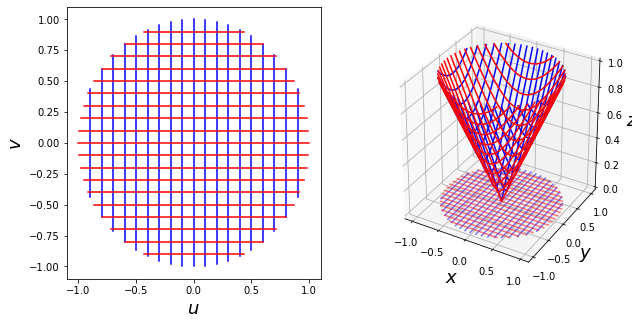

In [28]:
fig= plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')
u = v = np.linspace(-1,1,21)
r = lambda u,v: np.array([u,v,sqrt(u**2+v**2)])

ax1.set_xlabel('$u$',fontsize=18)
ax1.set_ylabel('$v$',fontsize=18)

ax2.set_xlabel('$x$',fontsize=18)
ax2.set_ylabel('$y$',fontsize=18)
ax2.set_zlabel('$z$',fontsize=18)

for i in u:
    ax1.plot(i*np.ones_like(v),v*sqrt(1-i**2),'b')
    ax2.plot(i*np.ones_like(v),v*sqrt(1-i**2),'b',alpha=.5)
    ax2.plot(*r(i*np.ones_like(v),v*sqrt(1-i**2)),'b')
for i in v:
    ax1.plot(u*sqrt(1-i**2),i*np.ones_like(u),'r')
    ax2.plot(u*sqrt(1-i**2),i*np.ones_like(u),'r',alpha=.5)
    ax2.plot(*r(u*sqrt(1-i**2),i*np.ones_like(u)),'r')

u,v = np.meshgrid(u,v)
# ax2.plot_wireframe(*r(u,v),color=('r','b'),rcount=10,ccount=10);


Here is the same cone parametrized a different way.

$$ \vec r(u,v) =  u \cos v\,\vec i +  u \sin v\,\vec j +  u\,\vec k$$

$$ 0 \leq u \leq 1$$
$$ 0 \leq v \leq 2\pi$$

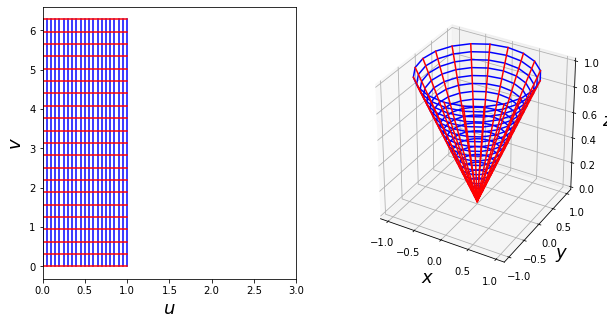

In [29]:
fig= plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')
u = np.linspace(0,1,21)
v = np.linspace(0,2*pi,21)
r = lambda u,v: np.array([u*cos(v),u*sin(v),u])
ax1.set_xlabel('$u$',fontsize=18)
ax1.set_ylabel('$v$',fontsize=18)

ax1.set_xlim((0,3))

ax2.set_xlabel('$x$',fontsize=18)
ax2.set_ylabel('$y$',fontsize=18)
ax2.set_zlabel('$z$',fontsize=18)

for i in u:
    ax1.plot(i*np.ones_like(v),v,'b')
    ax2.plot(*r(i*np.ones_like(v),v),'b')
for i in v:
    ax1.plot(u,i*np.ones_like(u),'r')
    ax2.plot(*r(u,i*np.ones_like(u)),'r')

u,v = np.meshgrid(u,v)
# ax2.plot_wireframe(*r(u,v),color=('r','b'),rcount=10,ccount=10);


## Parametrizing Surfaces

There are 3 kinds of surfaces you should be able to parametrize:

  1. graphs

  2. surfaces of revolution

  3. parts of spheres

## Graphs

More specifically, a graph of a function of two variables like $z = f(x,y)$:

$$\vec r(u,v) = u\,\vec i +  v\,\vec j +  f(u,v)\,\vec k$$

#### Example

$$ \vec r(u,v) = u \,\vec i + v \,\vec j + (1-v^2 +\frac{1}{10}\cos(2\pi u)) \,\vec k $$

$$ -2 \leq u \leq 2$$
$$ -1 \leq v \leq 1$$
  

In [30]:
@interact
def _(angle = (-108,102,6),
         r=fixed(lambda u,v: np.array([u,v,1-v**2 + 1/10* cos(2*pi*u)])),
         a=fixed(-2),b=fixed(2),
         c=fixed(lambda x: -1),d=fixed(lambda x: 1)):
    fig= plt.figure(figsize=(14,7))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122,projection='3d')

#     r = lambda u,v: np.array([u,v,1-v**2 + 1/10* cos(4*pi*u)])
    ax1.set_xlabel('$u$',fontsize=18)
    ax1.set_ylabel('$v$',fontsize=18)


#     ax2.set_zlim((0,2))    

    ax2.set_xlabel('$x$',fontsize=18)
    ax2.set_ylabel('$y$',fontsize=18)
    ax2.set_zlabel('$z$',fontsize=18)

    try:
        c(a)
    except TypeError:
        tmp = c
        c = (lambda x: tmp)
    try:
        d(a)
    except TypeError:
        tmp = d
        d = (lambda x: tmp)
    
    u = np.linspace(a,b,21)
    M = np.max([d(i) for i in u])
    m = np.min([c(i) for i in u])
    
#     print(m," -> ",M)
    
    for i in u:
        ax1.plot([i,i],[c(i),d(i)],'b')
        v = np.linspace(c(i),d(i),100)
        ax2.plot(*r(i*np.ones_like(v),v),'b')
    for j in np.linspace(m,M,21):
#         print(stripes(j,a,b,c,d))
        for xi,yi in stripes(j,a,b,c,d):
            ax1.plot([xi,yi],[j,j],'r')
            u = np.linspace(xi,yi,100)
            ax2.plot(*r(u,j*np.ones_like(u)),'r')

#     u,v = np.meshgrid(u,v)
    # ax2.plot_wireframe(*r(u,v),color=('r','b'),rcount=10,ccount=10);
    ax2.view_init(30,angle)


interactive(children=(IntSlider(value=-6, description='angle', max=102, min=-108, step=6), Output()), _dom_cla…

## Surfaces of Revolution

More specifically, a surface generated by taking a graph like $y=g(x)$ and rotating it about the $x$-axis:

$$\vec r(u,v) = u\,\vec i +  g(u)\cos v\,\vec j +  g(u)\sin v\,\vec k$$

for $ a \leq u \leq b$ and $0 \leq v \leq 2\pi$.
  
  
  

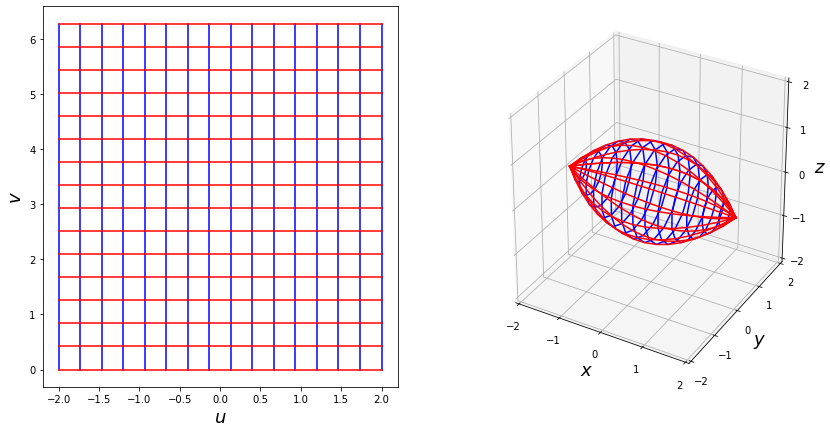

In [31]:
fig= plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')
u = np.linspace(-2,2,16)
v = np.linspace(0,2*pi,16)
r = lambda u,v: np.array([u,(4-u**2)/4*cos(v),(4-u**2)/4*sin(v)])
ax1.set_xlabel('$u$',fontsize=18)
ax1.set_ylabel('$v$',fontsize=18)

# ax1.set_xlim((0,3))

ax2.set_xlabel('$x$',fontsize=18)
ax2.set_ylabel('$y$',fontsize=18)
ax2.set_zlabel('$z$',fontsize=18)

for i in u:
    ax1.plot(i*np.ones_like(v),v,'b')
    ax2.plot(*r(i*np.ones_like(v),v),'b')
for i in v:
    ax1.plot(u,i*np.ones_like(u),'r')
    ax2.plot(*r(u,i*np.ones_like(u)),'r')

for c in 'xyz':
    getattr(ax2,f"set_{c}lim")((-2,2))
    getattr(ax2,f"set_{c}ticks")((-2,-1,0,1,2))

u,v = np.meshgrid(u,v)
# ax2.plot_wireframe(*r(u,v),color=('r','b'),rcount=10,ccount=10);


## Spheres

Use the angle parameters from spherical coordinates.

$$\vec r(u,v) = \sin u\cos v\,\vec i +  \sin u \sin v\,\vec j +  \cos u\,\vec k$$
  
Here, $u$ plays the role of $\phi$ and $v$ plays the role of $\theta$. (This is not required.)
  

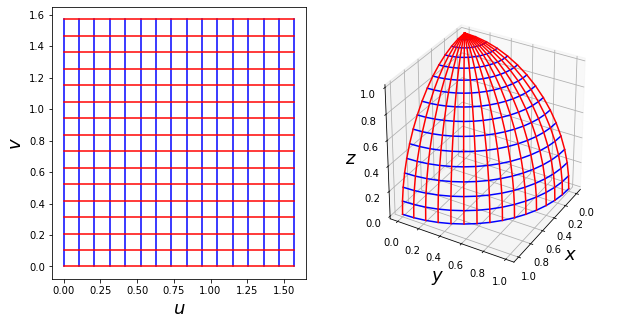

In [32]:
fig= plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')
u = np.linspace(0,pi/2,16)
v = np.linspace(0,pi/2,16)
r = lambda u,v: np.array([sin(u)*cos(v),sin(u)*sin(v),cos(u)])
ax1.set_xlabel('$u$',fontsize=18)
ax1.set_ylabel('$v$',fontsize=18)


ax2.set_xlabel('$x$',fontsize=18)
ax2.set_ylabel('$y$',fontsize=18)
ax2.set_zlabel('$z$',fontsize=18)

for i in u:
    ax1.plot(i*np.ones_like(v),v,'b')
    ax2.plot(*r(i*np.ones_like(v),v),'b')
for i in v:
    ax1.plot(u,i*np.ones_like(u),'r')
    ax2.plot(*r(u,i*np.ones_like(u)),'r')

# for c in 'xyz':
#     getattr(ax2,f"set_{c}lim")((-2,2))
#     getattr(ax2,f"set_{c}ticks")((-2,-1,0,1,2))

ax2.view_init(30,30)

u,v = np.meshgrid(u,v)
# ax2.plot_wireframe(*r(u,v),color=('r','b'),rcount=10,ccount=10);


# Surface Area

How do we measure area of a surface? Like most things in calculus, we chop it up into simple pieces.

In [33]:
@interact(zoom=(.1,1,.05))
def _(angle=(-126,96,6),zoom=1):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    F = lambda X,Y: X**2 + X/2 - Y**2/4 - (.25**2 + .25/2 - .25**2/4) + .25
#     r = np.linspace(0,1/2,100)
    x = y =np.linspace(.25 - zoom, .25 + zoom,50)
    X,Y = np.meshgrid(x,y)
    for lev in range(6):
        dx = 2**(-lev)
        ns = np.arange(np.ceil((.25 - zoom)/dx),np.ceil((.25 + zoom)/dx))
        if lev > 0:
            ns = [n for n in ns if n % 2]
        for n in ns:
            plt.plot(x,np.ones_like(y)*dx*n,F(x,np.ones_like(y)*dx*n),'k',alpha = np.min((1,dx + 1 - zoom)))
            plt.plot(np.ones_like(y)*dx*n,x,F(np.ones_like(y)*dx*n,x),'k',alpha = np.min((1,dx + 1 - zoom)))

    ax.plot_surface(X,Y,F(X,Y),alpha = .5)
#     ax.plot_wireframe(X,Y,F(X,Y),color='k',rcount=6,ccount=6)
#     r,t = np.meshgrid(np.linspace(0,1/2,50),np.linspace(0,2*pi,50))
#     X = r*cos(t)
#     Y = r*sin(t)
#     ax.plot_surface(X,Y,X**2 + X/2 - Y**2/4 - (.25**2 + .25/2 - .25**2/4) + .25)
    ax.view_init(30,angle)
    for ch in 'xyz':
        getattr(ax,f"set_{ch}lim")([.25 - zoom, .25 + zoom]);
        getattr(ax,f"set_{ch}ticks")([]);
        

interactive(children=(IntSlider(value=-18, description='angle', max=96, min=-126, step=6), FloatSlider(value=1…

# Surface Area

$$ dS = |\vec r_u \times \vec r_v |\, du\,dv$$ 

$$ \text{Surface Area } = \iint_\Omega dS = \int_a^b \int_c^d |\vec r_u \times \vec r_v |\, du\,dv$$ 

### Example

Find the surface area of a cylinder with radius $r$ and height $h$.

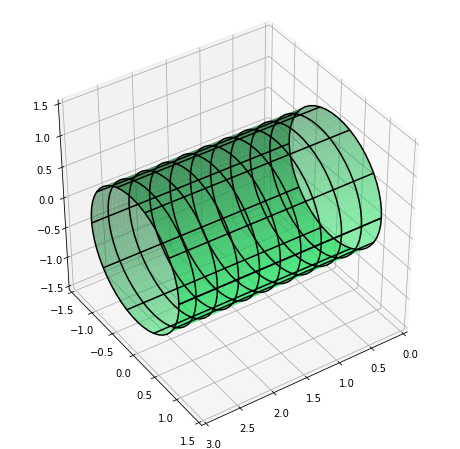

In [49]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
u = linspace(0,3)
v = linspace(0,2*pi)
u,v = meshgrid(u,v)
ax.plot_surface(u,cos(v),sin(v),color=(.1,1,.4,.5))
ax.plot_wireframe(u,cos(v),sin(v),color='k',rcount=10,ccount=10)
ax.view_init(39,56)
ax.set_zlim((-1.5,1.5));
ax.set_ylim((-1.5,1.5));
ax.set_xlim((0,3));

$$\vec r(u,v) = \langle u,r\cos(v),r\sin v \rangle$$

for $0 \leq u \leq h$ and $0 \leq v \leq 2\pi$.

$$ \vec r_u = \langle 1,0,0 \rangle $$
$$ \vec r_v = \langle 0, -r\sin v,r\cos v \rangle $$

$$\vec r_u\times \vec r_v = \langle 0,-r\cos v,-r\sin v \rangle$$

$$|\vec r_u\times \vec r_v| = r$$

$$\text{Surface area} = \int_0^{2\pi}\int_0^h r \,du\,dv = 2\pi r h$$

# Surface Integrals

  - With respect to surface area
  
      $$ \iint_\Omega f \, dS $$
      
    - **Where**: surface $\Omega$ with parametrization $\vec r(u,v)$ for $(u,v) \in \mathcal D\subset \RR^2$
    - **What**: scalar field $f(x,y,z)$ 
    - **How**: with respect to surface area $dS$ 

$$ \iint_\Omega f \, dS  = \iint_{\mathcal D} f(x(u,v),y(u,v),z(u,v))\, |\vec r_u \times \vec r_v|\, du\,dv $$


# Flux Integrals

  - of a vector field
  
      $$ \iint_\Omega \vec F \cdot \, d\vec S $$
      
    - **Where** surface $\Omega$ with parametrization $\vec r(u,v)$ for $(u,v) \in \mathcal D\subset \RR^2$
    - **What** vector field $\vec F(x,y,z)$ 
    - **How** dot wirh the notmal vector times surface area $d\vec S$ 

$$ \iint_\Omega \vec F \cdot \, dS =\iint_\Omega \vec F\cdot \vec N \,dS = \iint_{\mathcal D} \vec F(x(u,v),y(u,v),z(u,v))\cdot( \vec r_u \times \vec r_v)\, du\,dv $$
where $\vec N$ is the (oriented) unit normal vector to the surface.